In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dicision Tree

ID3 Decision Tree Accuracy: 1.0


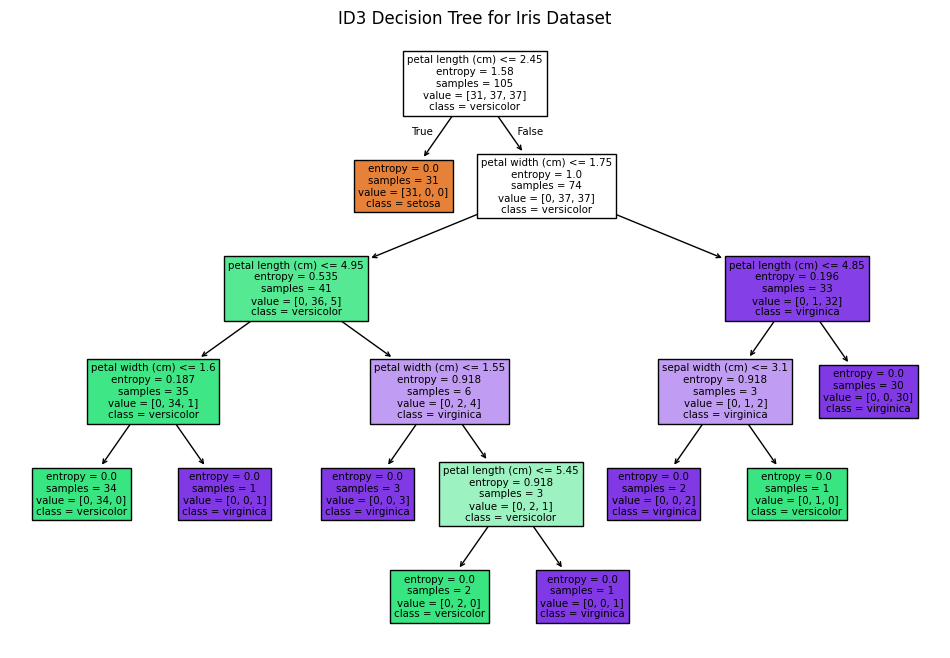

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create ID3 decision tree
id3_classifier = DecisionTreeClassifier(criterion="entropy")
id3_classifier.fit(X_train, y_train)

# Predictions
y_pred_id3 = id3_classifier.predict(X_test)

# Model Accuracy
accuracy_id3 = metrics.accuracy_score(y_test, y_pred_id3)
print(f"ID3 Decision Tree Accuracy: {accuracy_id3}")

# Plotting the tree
plt.figure(figsize=(12, 8))
plot_tree(id3_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("ID3 Decision Tree for Iris Dataset")
plt.show()


C4.5 Decision Tree Accuracy: 0.9777777777777777


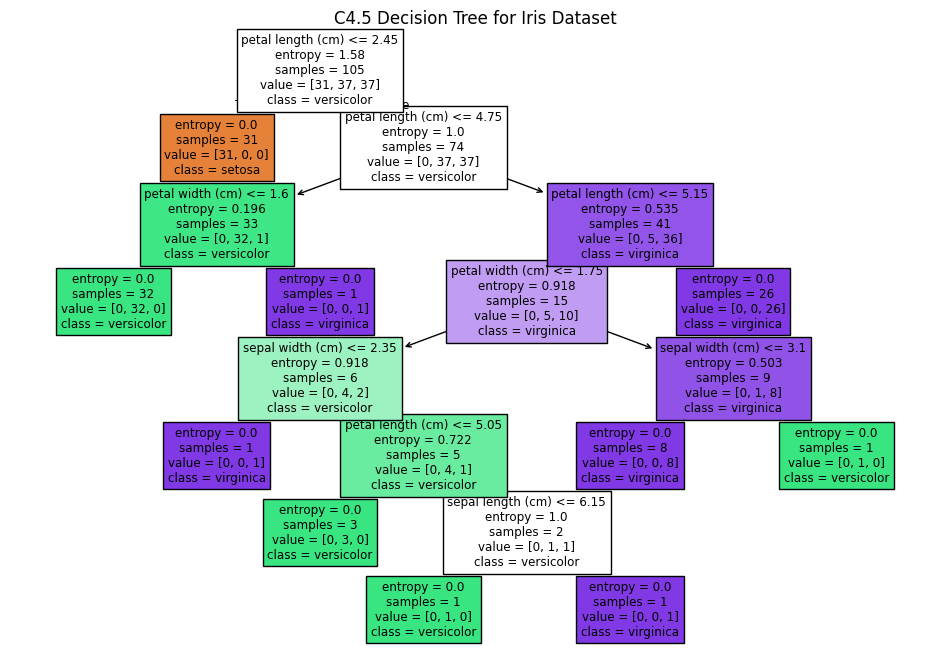

In [4]:
# Create C4.5 decision tree (using Information Gain Ratio)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import metrics

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create C4.5 decision tree
c45_classifier = DecisionTreeClassifier(criterion="entropy", splitter="best")
c45_classifier.fit(X_train, y_train)

# Predictions
y_pred_c45 = c45_classifier.predict(X_test)

# Model Accuracy
accuracy_c45 = metrics.accuracy_score(y_test, y_pred_c45)
print(f"C4.5 Decision Tree Accuracy: {accuracy_c45}")

# Plotting the tree
plt.figure(figsize=(12, 8))
plot_tree(c45_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("C4.5 Decision Tree for Iris Dataset")
plt.show()


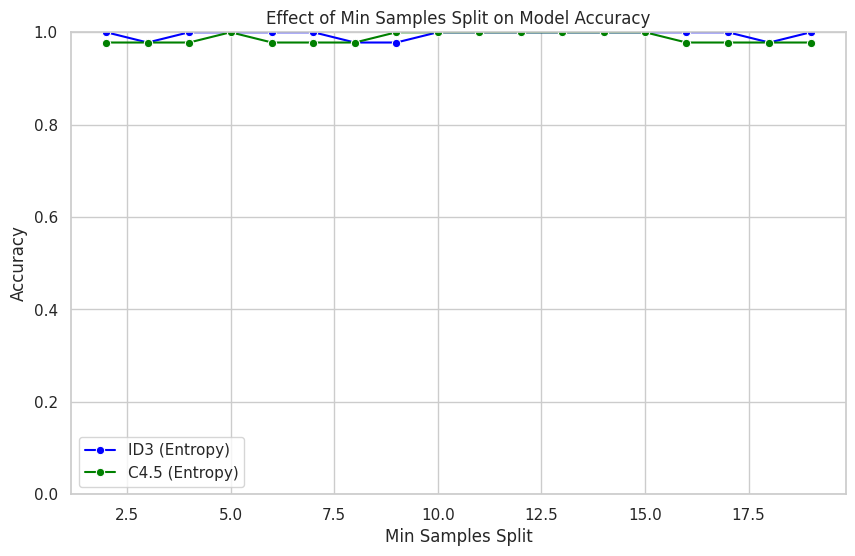

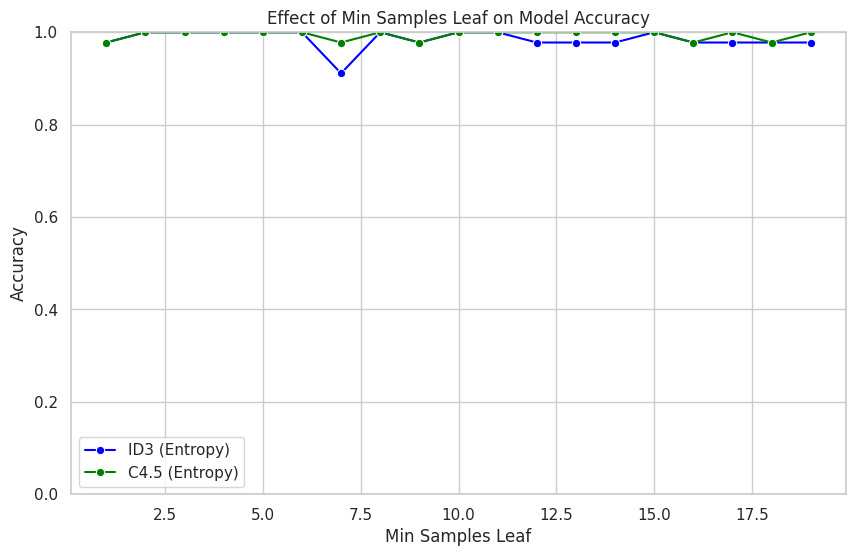

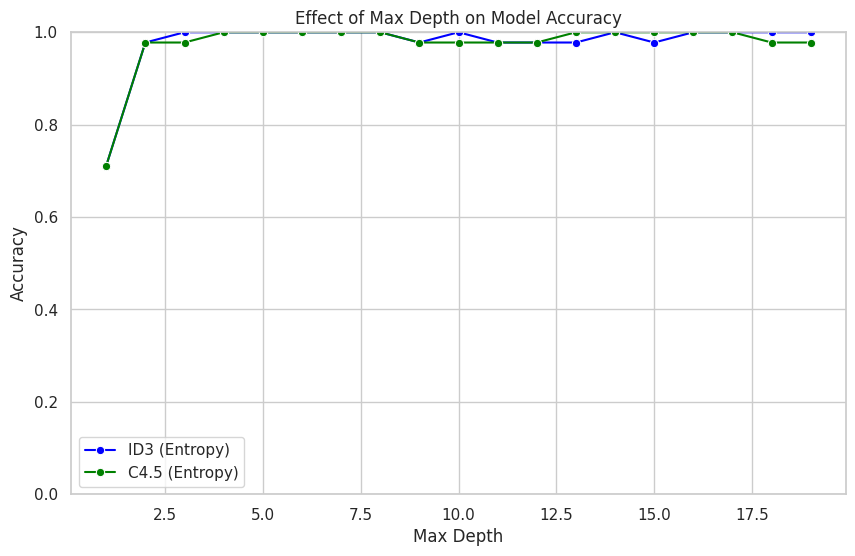

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_parameter_effects(param_name, param_display_name, param_values):
    id3_accuracies = []
    c45_accuracies = []

    for value in param_values:
        # ID3 Classifier (criterion = "entropy")
        id3_classifier = DecisionTreeClassifier(criterion="entropy", **{param_name: value})
        id3_classifier.fit(X_train, y_train)
        y_pred_id3 = id3_classifier.predict(X_test)
        accuracy_id3 = metrics.accuracy_score(y_test, y_pred_id3)
        id3_accuracies.append(accuracy_id3)

        # C4.5 Classifier (criterion = "entropy", different split mechanism)
        c45_classifier = DecisionTreeClassifier(criterion="entropy", splitter="best", **{param_name: value})
        c45_classifier.fit(X_train, y_train)
        y_pred_c45 = c45_classifier.predict(X_test)
        accuracy_c45 = metrics.accuracy_score(y_test, y_pred_c45)
        c45_accuracies.append(accuracy_c45)

    # Plot using Seaborn for comparison
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot ID3 results
    sns.lineplot(x=param_values, y=id3_accuracies, marker='o', label='ID3 (Entropy)', color='blue')

    # Plot C4.5 results
    sns.lineplot(x=param_values, y=c45_accuracies, marker='o', label='C4.5 (Entropy)', color='green')

    plt.title(f'Effect of {param_display_name} on Model Accuracy')
    plt.xlabel(param_display_name)
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.0)
    plt.legend()
    plt.show()

# Test the effects of the parameters on both ID3 and C4.5
plot_parameter_effects('min_samples_split', 'Min Samples Split', param_values=range(2, 20))
plot_parameter_effects('min_samples_leaf', 'Min Samples Leaf', param_values=range(1, 20))
plot_parameter_effects('max_depth', 'Max Depth', param_values=range(1, 20))

# Extra Decision Tree

In [6]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


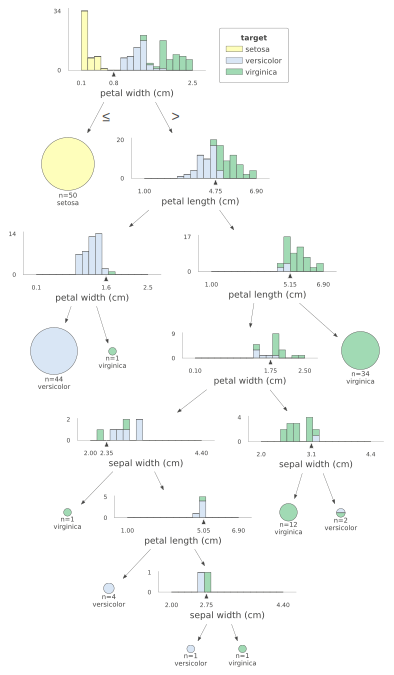

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import dtreeviz

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the ID3 classifier
id3_classifier = DecisionTreeClassifier(criterion="entropy")
id3_classifier.fit(X_train, y_train)

# Make predictions
y_pred_id3 = id3_classifier.predict(X_test)

# Calculate accuracy
accuracy_id3 = metrics.accuracy_score(y_test, y_pred_id3)

# Visualize the decision tree using dtreeviz
viz = dtreeviz.model(id3_classifier,
                     X,
                     y,
                     target_name="target",
                     feature_names=iris.feature_names,
                     class_names=list(iris.target_names))


viz.view()